<a href="https://colab.research.google.com/github/Najibazharun10/UAS-BIG-DATA-ANALIYSTICS-PREDICTIVE/blob/main/UAS_22_11_4672_BIG_DATA_LANJUT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : NAJIB AZHARUN NAJWA<BR>
NIM  : 22.11.4672<br>
KELAS: BIG DATA LANJUT 08


In [1]:
import pandas as pd

# Load the uploaded CSV file to inspect its structure
file_path = '/content/Amazon products.csv'
data = pd.read_csv(file_path)

# Display the first few rows and basic information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 63 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    1000 non-null   object 
 1   seller_name              1000 non-null   object 
 2   brand                    1000 non-null   object 
 3   description              1000 non-null   object 
 4   initial_price            1000 non-null   float64
 5   final_price              1000 non-null   float64
 6   currency                 1000 non-null   object 
 7   availability             999 non-null    object 
 8   reviews_count            1000 non-null   int64  
 9   categories               1000 non-null   object 
 10  asin                     1000 non-null   object 
 11  buybox_seller            1000 non-null   object 
 12  number_of_sellers        1000 non-null   int64  
 13  root_bs_rank             1000 non-null   int64  
 14  answered_questions       

(None,
                                                title  \
 0  Desert Cactus Kappa Delta Sticker Classic Flor...   
 1  Under Desk Elliptical Machine, Electric Ellips...   
 2  CLIF BLOKS - Mountain Berry Flavor - Energy Ch...   
 3  Desert Cactus Kappa Delta Sticker Decal Laptop...   
 4  Notakia Cute Ceramics Balloon Dog Statue Craft...   
 
                 seller_name                   brand  \
 0     Des███ Ca███s D██████           Desert Cactus   
 1        Put███-Ex███ise███                  Putnen   
 2              Ama███.co███  Mondelēz International   
 3     Des███ Ca███s D██████           Desert Cactus   
 4  GAO███ Pr███cts█████████                 Notakia   
 
                                          description  initial_price  \
 0  All of our golf balls are printed in our facil...           9.99   
 1  Previous page Next page 1 Anywhere & Anytime 2...         189.99   
 2  Designed by athletes for athletes, CLIF BLOKS ...          44.99   
 3  All of our golf bal

In [25]:
# Renaming columns for simplicity and consistency
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

# Checking for null values and data types
null_summary = data.isnull().sum()
data_types = data.dtypes

# Dropping columns with too many missing values (>50% missing)
columns_to_drop = [col for col in data.columns if data[col].isnull().mean() > 0.5]
data_cleaned = data.drop(columns=columns_to_drop)

# Filling missing values for numerical columns with the median
numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_cleaned[numerical_cols] = data_cleaned[numerical_cols].fillna(data_cleaned[numerical_cols].median())

# Filling missing values for categorical columns with the mode
categorical_cols = data_cleaned.select_dtypes(include=['object', 'bool']).columns
data_cleaned[categorical_cols] = data_cleaned[categorical_cols].fillna(data_cleaned[categorical_cols].mode().iloc[0])

# Converting categorical columns to category type
data_cleaned[categorical_cols] = data_cleaned[categorical_cols].astype('category')

# Computing summary statistics
summary_stats = data_cleaned.describe(include='all')

# Computing correlation matrix for numerical columns
correlation_matrix = data_cleaned[numerical_cols].corr()

# Outputs
{
    "null_summary": null_summary,
    "columns_dropped": columns_to_drop,
    "data_types": data_types,
    "summary_stats": summary_stats,
    "correlation_matrix": correlation_matrix
}

{'null_summary': title                        0
 seller_name                  0
 brand                        0
 description                  0
 initial_price                0
                           ... 
 sustainability_features    930
 climate_pledge_friendly      0
 videos                       9
 other_sellers_prices       297
 downloadable_videos          5
 Length: 63, dtype: int64,
 'columns_dropped': ['upc',
  'format',
  'input_asin',
  'ingredients',
  'origin_url',
  'sustainability_features'],
 'data_types': title                       object
 seller_name                 object
 brand                       object
 description                 object
 initial_price              float64
                             ...   
 sustainability_features     object
 climate_pledge_friendly       bool
 videos                      object
 other_sellers_prices        object
 downloadable_videos         object
 Length: 63, dtype: object,
 'summary_stats':                               

In [7]:
!pip install matplotlib seaborn

<ipython-input-26-23b5b810a13d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')


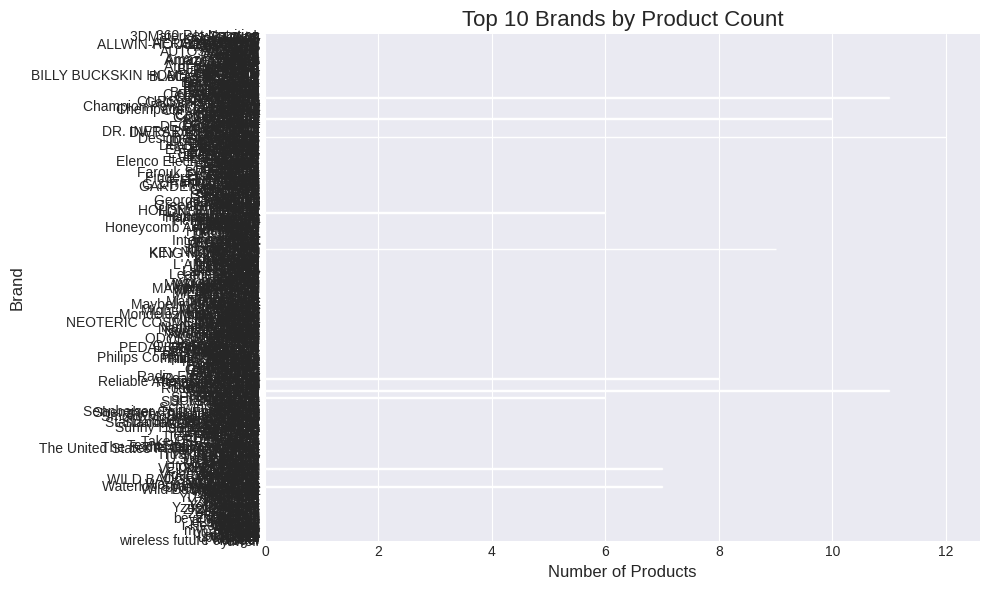

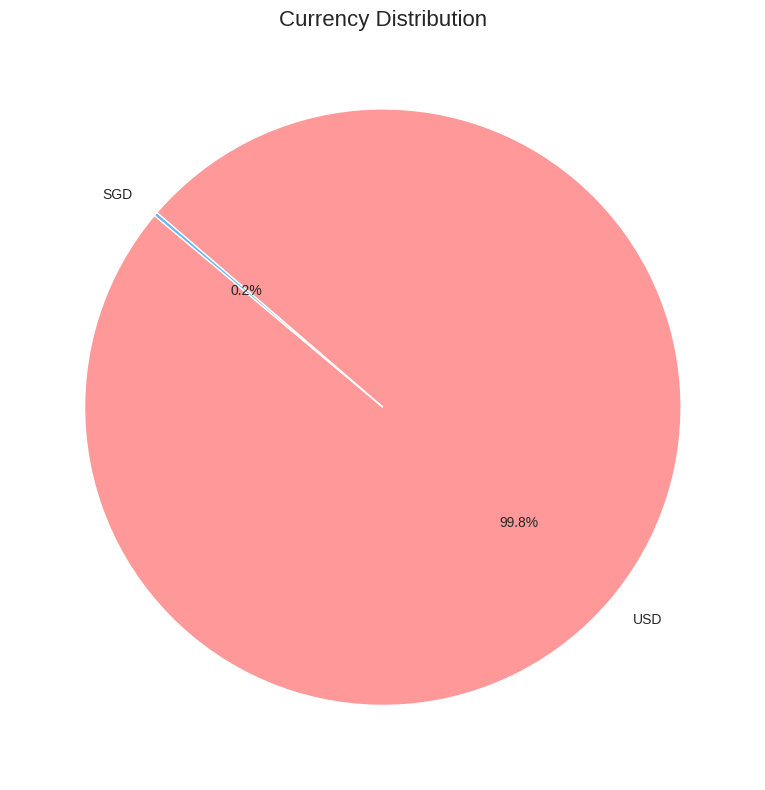

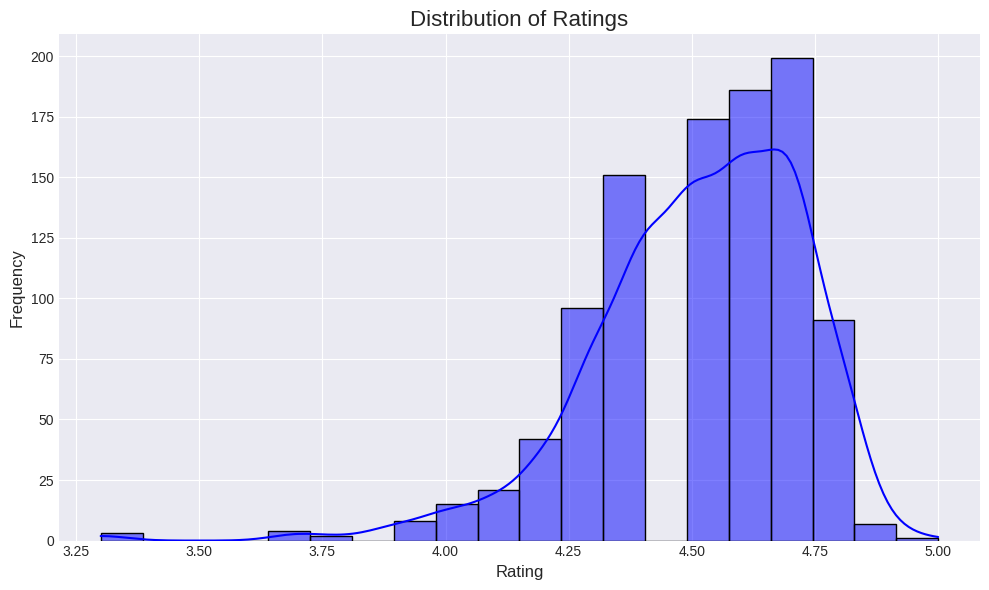

<ipython-input-26-23b5b810a13d>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=price_data, x='Price Type', y='Price', palette='Set2')


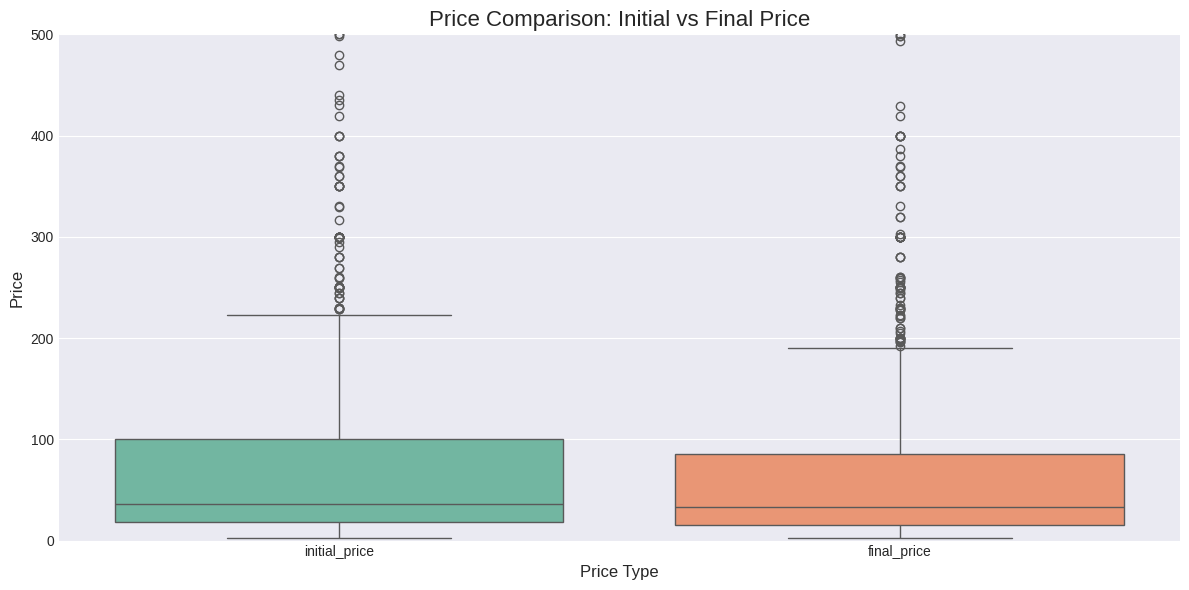

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot style
plt.style.use("seaborn-v0_8-darkgrid")

# 1. Bar Chart: Top 10 Brands by Product Count
top_brands = data_cleaned['brand'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')
plt.title("Top 10 Brands by Product Count", fontsize=16)
plt.xlabel("Number of Products", fontsize=12)
plt.ylabel("Brand", fontsize=12)
plt.tight_layout()
plt.show()

# 2. Pie Chart: Distribution of Currency
currency_counts = data_cleaned['currency'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(currency_counts, labels=currency_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title("Currency Distribution", fontsize=16)
plt.tight_layout()
plt.show()

# 3. Histogram: Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['rating'], bins=20, kde=True, color="blue", edgecolor="black")
plt.title("Distribution of Ratings", fontsize=16)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

# 4. Boxplot: Price Comparison (Initial vs Final Price)
plt.figure(figsize=(12, 6))
price_data = data_cleaned[['initial_price', 'final_price']].melt(var_name='Price Type', value_name='Price')
sns.boxplot(data=price_data, x='Price Type', y='Price', palette='Set2')
plt.title("Price Comparison: Initial vs Final Price", fontsize=16)
plt.ylabel("Price", fontsize=12)
plt.xlabel("Price Type", fontsize=12)
plt.ylim(0, 500)  # Limiting for better visualization
plt.tight_layout()
plt.show()

In [54]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier, LogisticRegression, NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.sql.types import IntegerType, DoubleType

# Initialize Spark session
spark = SparkSession.builder.appName("AmazonProductClassification").getOrCreate()

# Load the dataset
file_path = "Amazon products.csv"  # Update with your file path if running locally
spark_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Explicitly cast 'rating' and 'reviews_count' to the correct data types
spark_df = spark_df.withColumn("rating", col("rating").cast(DoubleType()))
spark_df = spark_df.withColumn("reviews_count", col("reviews_count").cast(IntegerType()))

# Select relevant columns
selected_columns = [
    "climate_pledge_friendly",  # Target
    "reviews_count",           # Numerical feature
    "rating",                  # Numerical feature
    "final_price",             # Numerical feature
    "initial_price",           # Numerical feature
    "images_count"             # Numerical feature
]
spark_df = spark_df.select(selected_columns)

# Handle missing values (fill with mean for simplicity)
for col_name in ["reviews_count", "rating", "final_price", "initial_price", "images_count"]:
    # Ensure the column is treated as numeric before calculating the mean
    spark_df = spark_df.withColumn(col_name, col(col_name).cast(DoubleType()))
    mean_value = spark_df.select(col_name).dropna().groupBy().mean(col_name).collect()[0][0]
    spark_df = spark_df.fillna({col_name: mean_value})

# Handle target column (convert to binary: 1 if "YES", 0 otherwise)
spark_df = spark_df.withColumn(
    "target",
    when(col("climate_pledge_friendly") == "YES", 1).otherwise(0)
).drop("climate_pledge_friendly")

# Assemble features
feature_cols = ["reviews_count", "rating", "final_price", "initial_price", "images_count"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")

# Split data into training and testing sets
train_df, test_df = spark_df.randomSplit([0.8, 0.2], seed=42)

# Define models
rf = RandomForestClassifier(featuresCol="scaled_features", labelCol="target", seed=42)
gbt = GBTClassifier(featuresCol="scaled_features", labelCol="target", seed=42)
lr = LogisticRegression(featuresCol="scaled_features", labelCol="target")
nb = NaiveBayes(featuresCol="scaled_features", labelCol="target")

# Create pipelines for each model
pipelines = {
    "Random Forest": Pipeline(stages=[assembler, scaler, rf]),
    "Gradient Boosted Tree": Pipeline(stages=[assembler, scaler, gbt]),
    "Logistic Regression": Pipeline(stages=[assembler, scaler, lr]),
    "Naive Bayes": Pipeline(stages=[assembler, scaler, nb])
}

results = {}  # Initialize a dictionary to store results

# Define evaluators
multi_evaluator = MulticlassClassificationEvaluator(labelCol="target", predictionCol="prediction")
binary_evaluator = BinaryClassificationEvaluator(labelCol="target", rawPredictionCol="rawPrediction", metricName="areaUnderROC")

for model_name, pipeline in pipelines.items():
    # Train the model
    trained_model = pipeline.fit(train_df)
    predictions = trained_model.transform(test_df)

    # Initialize result dictionary
    model_results = {}

    # Evaluate Accuracy
    accuracy = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "accuracy"})
    model_results["Accuracy"] = accuracy

    # Evaluate F1-Score
    f1 = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "f1"})
    model_results["F1-Score"] = f1

    # Evaluate Precision
    precision = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "weightedPrecision"})
    model_results["Precision"] = precision

    # Evaluate Recall
    recall = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "weightedRecall"})
    model_results["Recall"] = recall

    # Evaluate AUC (only for binary classification)
    try:
        auc = binary_evaluator.evaluate(predictions)
        model_results["AUC"] = auc
    except Exception as e:
        model_results["AUC"] = "Not Applicable (multi-class)"

    # Store results
    results[model_name] = model_results

# Display results
for model, metrics in results.items():
    print(f"\nModel: {model}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}" if isinstance(value, float) else f"{metric_name}: {value}")


Model: Random Forest
Accuracy: 1.0000
F1-Score: 1.0000
Precision: 1.0000
Recall: 1.0000
AUC: Not Applicable (multi-class)

Model: Gradient Boosted Tree
Accuracy: 1.0000
F1-Score: 1.0000
Precision: 1.0000
Recall: 1.0000
AUC: 0.0000

Model: Logistic Regression
Accuracy: 1.0000
F1-Score: 1.0000
Precision: 1.0000
Recall: 1.0000
AUC: Not Applicable (multi-class)

Model: Naive Bayes
Accuracy: 1.0000
F1-Score: 1.0000
Precision: 1.0000
Recall: 1.0000
AUC: Not Applicable (multi-class)


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Pilih kolom yang relevan
selected_columns = [
    'initial_price', 'final_price', 'reviews_count', 'rating',
    'number_of_sellers', 'answered_questions', 'images_count', 'video_count'
]
cleaned_data = data[selected_columns].dropna()

# Fitur dan target
X = cleaned_data.drop('rating', axis=1)
y = cleaned_data['rating']

# Bagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Latih model awal
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Prediksi awal
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Evaluasi awal
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))

rf_mae, rf_rmse, gb_mae, gb_rmse

(0.14531999999999998,
 0.18215350669147154,
 0.14628151374773204,
 0.18161787574405594)

In [56]:
from sklearn.model_selection import GridSearchCV

# Parameter untuk tuning Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Parameter untuk tuning Gradient Boosting
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# GridSearchCV untuk Random Forest
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# GridSearchCV untuk Gradient Boosting
gb_grid = GridSearchCV(gb_model, gb_params, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
gb_grid.fit(X_train, y_train)

# Best models and their performance
rf_best_model = rf_grid.best_estimator_
gb_best_model = gb_grid.best_estimator_

rf_best_params = rf_grid.best_params_
gb_best_params = gb_grid.best_params_

# Evaluasi ulang model terbaik
rf_tuned_predictions = rf_best_model.predict(X_test)
gb_tuned_predictions = gb_best_model.predict(X_test)

rf_tuned_mae = mean_absolute_error(y_test, rf_tuned_predictions)
rf_tuned_rmse = np.sqrt(mean_squared_error(y_test, rf_tuned_predictions))

gb_tuned_mae = mean_absolute_error(y_test, gb_tuned_predictions)
gb_tuned_rmse = np.sqrt(mean_squared_error(y_test, gb_tuned_predictions))

rf_best_params, rf_tuned_mae, rf_tuned_rmse, gb_best_params, gb_tuned_mae, gb_tuned_rmse

({'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200},
 0.14613644841420695,
 0.18167507676984948,
 {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200},
 0.1480358586806538,
 0.18384285647409082)

In [57]:
# Retry hyperparameter tuning and evaluation due to earlier connection error

# GridSearchCV for Random Forest
rf_grid_retry = GridSearchCV(rf_model, rf_params, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
rf_grid_retry.fit(X_train, y_train)

# GridSearchCV for Gradient Boosting
gb_grid_retry = GridSearchCV(gb_model, gb_params, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
gb_grid_retry.fit(X_train, y_train)

# Best models and parameters
rf_best_model_retry = rf_grid_retry.best_estimator_
gb_best_model_retry = gb_grid_retry.best_estimator_

rf_best_params_retry = rf_grid_retry.best_params_
gb_best_params_retry = gb_grid_retry.best_params_

# Evaluate the tuned models
rf_tuned_predictions_retry = rf_best_model_retry.predict(X_test)
gb_tuned_predictions_retry = gb_best_model_retry.predict(X_test)

rf_tuned_mae_retry = mean_absolute_error(y_test, rf_tuned_predictions_retry)
rf_tuned_rmse_retry = np.sqrt(mean_squared_error(y_test, rf_tuned_predictions_retry))

gb_tuned_mae_retry = mean_absolute_error(y_test, gb_tuned_predictions_retry)
gb_tuned_rmse_retry = np.sqrt(mean_squared_error(y_test, gb_tuned_predictions_retry))

rf_best_params_retry, rf_tuned_mae_retry, rf_tuned_rmse_retry, gb_best_params_retry, gb_tuned_mae_retry, gb_tuned_rmse_retry

({'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200},
 0.14613644841420695,
 0.18167507676984948,
 {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200},
 0.1480358586806538,
 0.18384285647409082)

MODEL TERBAIK

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score # Import r2_score

# Initialize the Gradient Boosted Tree model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model on the training set
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb) # Now r2_score is defined

mse_gb, r2_gb

(0.032985052789783344, 0.17822933332212199)